# 都市計画shapeファイルの変換処理

国土交通省の[都市計画決定GISデータ](https://www.mlit.go.jp/toshi/tosiko/toshi_tosiko_tk_000087.html)


## ファイル一括読込の処理

Matplotlib is building the font cache; this may take a moment.


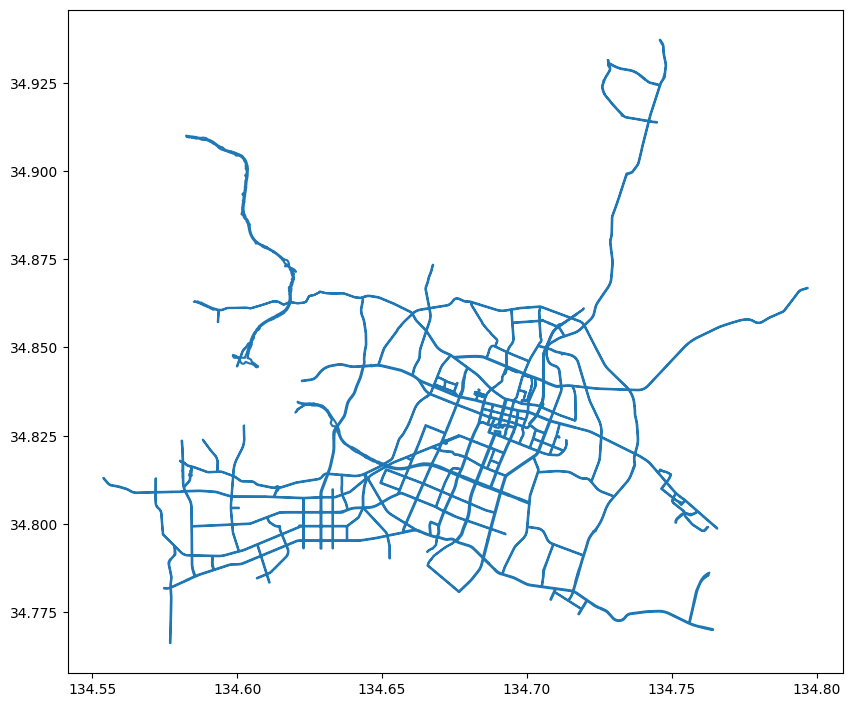

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   区分        428 non-null    object  
 1   kubunID   428 non-null    int64   
 2   Pref      428 non-null    object  
 3   Citycode  428 non-null    object  
 4   Cityname  428 non-null    object  
 5   当初決定日     0 non-null      float64 
 6   最終告示日     423 non-null    object  
 7   決定区分      0 non-null      object  
 8   決定者       0 non-null      object  
 9   告示番号S     0 non-null      float64 
 10  告示番号L     423 non-null    object  
 11  geometry  428 non-null    geometry
dtypes: float64(2), geometry(1), int64(1), object(8)
memory usage: 40.2+ KB
None


In [20]:
import geopandas as gpd
import matplotlib.pyplot as plt

def display_shapefile(shapefile_path):
    # シェープファイルを読み込む
    gdf = gpd.read_file(shapefile_path)
    
    # プロットを作成
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # GeoDataFrameをプロット
    gdf.plot(ax=ax)
    
    # プロットを表示
    plt.show()

    return gdf

# 使用例
shapefile_path = './shape/28_兵庫県/28201_姫路市/28201_douro.shp'
gdf = display_shapefile(shapefile_path)

# データの基本情報を表示（オプション）
print(gdf.info())

prefCodeが数値になっているので、2桁の文字列に変換する

# 都市計画道路

In [18]:
import os

def get_douro_shp_files():

    directory = './shape'
    extension = '.shp'
    keyword = '_douro'
    
    file_list = []
    
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(extension) and keyword in file:
                file_list.append(os.path.join(root, file))
    
    return file_list

file_list = get_douro_shp_files()
print(file_list)

['./shape/41_佐賀県/41204_多久市/41204_douro.shp', './shape/41_佐賀県/41208_小城市/41208_douro.shp', './shape/41_佐賀県/41206_武雄市/41206_douro.shp', './shape/41_佐賀県/41201_佐賀市/41201_douro.shp', './shape/41_佐賀県/41341_基山町/41341_douro.shp', './shape/41_佐賀県/41207_鹿島市/41207_douro.shp', './shape/41_佐賀県/41203_鳥栖市/41203_douro.shp', './shape/41_佐賀県/41209_嬉野市/41209_douro.shp', './shape/18_福井県/18208_あわら市/18208_douro.shp', './shape/18_福井県/18201_福井市/18201_douro.shp', './shape/18_福井県/18209_越前市/18209_douro.shp', './shape/18_福井県/18206_勝山市/18206_douro.shp', './shape/18_福井県/18205_大野市/18205_douro.shp', './shape/18_福井県/18202_敦賀市/18202_douro.shp', './shape/18_福井県/18207_鯖江市/18207_douro.shp', './shape/29_奈良県/29427_河合町/29427_douro.shp', './shape/29_奈良県/29342_平群町/29342_douro.shp', './shape/29_奈良県/29206_桜井市/29206_douro.shp', './shape/29_奈良県/29212_宇陀市/29212_douro.shp', './shape/29_奈良県/29201_奈良市/29201_douro.shp', './shape/29_奈良県/29424_上牧町/29424_douro.shp', './shape/29_奈良県/29425_王寺町/29425_douro.shp', './shape/29_奈良県/29205_橿原市/2920

In [ ]:
import geopandas as gpd

def merge_shapefiles(file_list, output_file='merged_shapefile.shp'):
    # 空のGeoDataFrameを作成して結果を格納
    merged_gdf = gpd.GeoDataFrame()
    
    # 各shapefileを読み込んで結合
    for file in file_list:
        gdf = gpd.read_file(file)
        merged_gdf = merged_gdf.append(gdf, ignore_index=True)
    
    # 結合されたデータを保存
    merged_gdf.to_file(output_file)
    
    return merged_gdf